In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly

# sns.set_style('darkgrid')
# with plt.style.context('darkgrid'):


%matplotlib inline

# Recap

## [1_EDA_unique](notebooks/1_EDA_unique.ipynb)

**input:** 1_raw_data.csv \
**output:** 2_unique_data.csv \
**aim:**
 - identify sourse of the dataset
 - identify volume of the dataset
 - handle duplicate value in the dataset
 
## 2_EDA_cleaning
**aim:**
    format Rating, Reviews, Size, Installs, Type, Price, Last Updated, Current Ver, Android Ver into right data type

In [2]:
# read the dataset
data_dir = '../datasets/googleplaystore'
data = pd.read_csv(f'{data_dir}/2_unique_data.csv', index_col=0)
data

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Exploratory Data Analysis (EDA)

In [3]:
result_data = {}

## Data Cleaning

### App Feature

In [4]:
data['app']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: app, Length: 10358, dtype: object

In [5]:
data['app'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

### Category Feature

In [6]:
data['category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: category, Length: 10358, dtype: object

In [7]:
data['category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

### Rating Feature

In [8]:
data['rating'].describe()

count    8893.000000
mean        4.189542
std         0.545452
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: rating, dtype: float64

### Reviews Feature

In [9]:
data['reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: reviews, Length: 10358, dtype: object

In [10]:
df = data['reviews'].str.extract('(^[0-9\.]+)([A-Z]*)')
df[1].unique()

array(['', 'M'], dtype=object)

In [11]:
unit = {'K':3, 'M':6, 'B':9}

In [12]:
df.apply(lambda x: int(float(x[0])*10**unit[x[1]] if x[1] else x[0]), axis=1).astype('int')

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Length: 10358, dtype: int32

In [13]:
def reviews_cleaner(ser):
    df = ser.str.extract('(^[0-9\.]+)([A-Z]*)')
    unit = {'K':3, 'M':6, 'B':9}
    return df.apply(lambda x: int(float(x[0])*10**unit[x[1]] if x[1] else x[0]), axis=1).astype('int')

result_data['reviews'] = reviews_cleaner

### Size Feature

In [14]:
with pd.option_context('display.min_rows', 20):
    print(data['size'])

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
                ...        
10831                  9.8M
10832                  582k
10833                  619k
10834                  2.6M
10835                  9.6M
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: size, Length: 10358, dtype: object


In [15]:
data['size'].isnull().sum()

0

In [16]:
ser = data['size'].replace('Varies with device', np.nan)
ser

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839     NaN
10840     19M
Name: size, Length: 10358, dtype: object

In [17]:
df = ser[~ser.isnull()].str.extract('(^[0-9\.]+)([A-Za-z]*)')
df

,0,1
0,19,M
1,14,M
2,8.7,M
3,25,M
4,2.8,M
...,...,...
10835,9.6,M
10836,53,M
10837,3.6,M
10838,9.5,M


In [18]:
df[1].unique()

array(['M', 'k', ''], dtype=object)

In [19]:
# result_data['Reviews'] = 
def format_unit(args):
    if args[1]=='':
        return float(args[0])/1_000
    elif args[1]=='k' or args[1]=='K':
        return float(args[0])
    elif args[1]=='M' or args[1]=='m':
        return float(args[0])*1_000        
    elif args[1]=='B' or args[1]=='b':
        return float(args[0])*1_000_000
    else:
        return x

df.apply(format_unit, axis=1)

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10835     9600.0
10836    53000.0
10837     3600.0
10838     9500.0
10840    19000.0
Length: 8832, dtype: float64

In [20]:
def size_cleaner(ser):
    ser = ser.replace('Varies with device', np.nan)
    df = ser[~ser.isnull()].str.extract('(^[0-9\.]+)([A-Za-z]*)')
    
    def format_unit(args):
        if args[1]=='':
            return float(args[0])/1_000
        elif args[1]=='k' or args[1]=='K':
            return float(args[0])
        elif args[1]=='M' or args[1]=='m':
            return float(args[0])*1_000        
        elif args[1]=='B' or args[1]=='b':
            return float(args[0])*1_000_000
        else:
            return x
    
    return df.apply(format_unit, axis=1)
    
result_data['size'] = size_cleaner

### Installs Feature

In [21]:
data['installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: installs, Length: 10358, dtype: object

In [22]:
data['installs'].apply(len).sort_values()

9148     1
6345     2
5171     2
7182     2
4459     2
        ..
338     14
336     14
335     14
3904    14
391     14
Name: installs, Length: 10358, dtype: int64

In [23]:
data.loc[data['installs'].apply(len).sort_values().index, 'installs'].unique()

array(['0', '5+', '1+', '0+', '50+', '10+', '500+', '100+', 'Free',
       '1,000+', '5,000+', '10,000+', '50,000+', '100,000+', '500,000+',
       '1,000,000+', '5,000,000+', '50,000,000+', '10,000,000+',
       '100,000,000+', '500,000,000+', '1,000,000,000+'], dtype=object)

In [24]:
ser = data['installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).str.replace('Free', '0')
ser

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: installs, Length: 10358, dtype: object

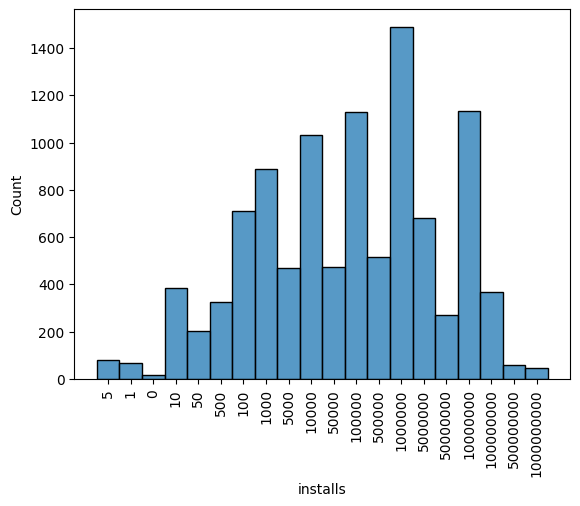

In [25]:
ax = sns.histplot(ser[ser.apply(len).sort_values().index])
ax.tick_params(axis='x', rotation=90)

In [26]:
def installs_cleaner(ser):
    ser = ser.str.replace('+', '', regex=False).str.replace(',', '', regex=False).str.replace('Free', '0')
    
    def installs_encoding(arg):
        if arg.startswith('0'):
            return 0
        else:
            n = len(arg)
            if arg.startswith('5'):
                n+=0.5
            return n
            
    return ser.apply(installs_encoding)

result_data['installs']= installs_cleaner

### Type Feature

In [27]:
data['type']

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: type, Length: 10358, dtype: object

In [28]:
data['type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [29]:
data['type'].replace('0', 'Free')

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: type, Length: 10358, dtype: object

In [30]:
def type_cleaner(ser):
    return ser.replace('0', 'Free')

result_data['type'] = type_cleaner

### Price Feature

In [31]:
data['price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: price, Length: 10358, dtype: object

In [32]:
data['price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [33]:
data['price'].str.replace('Everyone', '0').str.replace('$', '', regex=False).astype('float')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: price, Length: 10358, dtype: float64

In [34]:
def price_cleaner(ser):
    return ser.str.replace('Everyone', '0').str.replace('$', '', regex=False).astype('float')
result_data['price'] = price_cleaner

### Content Rating Feature

In [35]:
data['content_rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: content_rating, Length: 10358, dtype: object

In [36]:
data['content_rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

### Genres Feature

In [37]:
data['genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: genres, Length: 10358, dtype: object

In [38]:
data['genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

### Last Updated Feature

In [39]:
data['last_updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: last_updated, Length: 10358, dtype: object

In [40]:
data['last_updated'].isnull().sum()

0

In [41]:
ser = pd.to_datetime(data['last_updated'], format='%B %d, %Y', errors='coerce')
ser

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: last_updated, Length: 10358, dtype: datetime64[ns]

In [42]:
ser.isnull().sum()

1

In [43]:
def last_updated_cleaner(ser):
    return pd.to_datetime(ser, format='%B %d, %Y', errors='coerce')
result_data['last_updated'] = last_updated_cleaner

### Current Version Feature

In [44]:
data['current_ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: current_ver, Length: 10358, dtype: object

In [45]:
data['current_ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

### Android Version Feature

In [46]:
data['android_ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: android_ver, Length: 10358, dtype: object

In [47]:
data['android_ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## Observation

current_ver and android_ver will format if required

In [48]:
result_data

{'reviews': <function __main__.reviews_cleaner(ser)>,
 'size': <function __main__.size_cleaner(ser)>,
 'installs': <function __main__.installs_cleaner(ser)>,
 'type': <function __main__.type_cleaner(ser)>,
 'price': <function __main__.price_cleaner(ser)>,
 'last_updated': <function __main__.last_updated_cleaner(ser)>}

In [49]:
df = data.copy()

In [50]:
for col_name,map_func in result_data.items():
    df[col_name] = map_func(data[col_name])
df

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,5.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,6.5,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,7.5,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,8.5,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,6.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,4.5,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,3.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,4.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,4.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [51]:
df.to_csv(f'{data_dir}/3_cleaned_data.csv') #, index_label='index')